In [1]:
#Author: James Negus

import math
import os
import glob
import csv
import shutil

import numpy as np
import numpy.ma as ma
from numpy import arange,array,ones
from numpy import exp, linspace, random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.mlab as mlab
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText

from astropy.io import fits
from astropy.modeling import models, fitting
import astropy.io.ascii as a

# from uncertainties import unumpy
# from uncertainties import ufloat

import pylab as plb

from scipy.optimize import curve_fit
from scipy.optimize import leastsq as lmfitter
from scipy import signal
from scipy import asarray as ar,exp
from scipy.stats import chisquare
from scipy.stats import stats
from scipy.integrate import quad
from scipy.stats import linregress

import scipy.io
import scipy.integrate as integrate

from IPython.display import display, Math

from mpl_toolkits.mplot3d import Axes3D

from itertools import chain

#import sherpa.ui as ui
import pandas as pd
from sklearn.linear_model import LinearRegression

import marvin
#from marvin.tools import Maps
from marvin.utils.general.images import showImage
from marvin.tools.cube import Cube
from marvin import config
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

#Emission Lines (Vacuum)

OVI = 1033.82 
Ly_Alpha = 1215.24  
NV = 1240.81  
OI = 1305.53  
CII = 1335.31  
Si_IV = 1397.61  
Si_IV_O_IV = 1399.8  
CIV = 1549.48  
He_II = 1640.4
OIII = 1665.85 
Al_III = 1857.4 
CIII = 1908.734 
CII = 2326.0 
Ne_IV = 2439.5 
Mg_II = 2799.117 
Ne_V = 3346.79 #*
Ne_VI = 3426.85 
Fe_VII_1 = 3586 #*
OII_1 = 3727.092 ###
OII_2 = 3729.875  
Fe_VII_2 = 3760 #*
He_I = 3889.0 
SII = 4072.3 
H = 4102.89 
H = 4341.68  
OIII_1 = 4364.436  
H_Beta = 4862.68  
OIII_2 = 4932.603  
OIII_3 = 4960.295  
OIII_4 = 5008.240  
Fe_VII_3 = 6086 #*
OI_1 = 6302.046  
OI_2 = 6365.536  ###
Fe_X = 6374 #* Very hard to detect because it is so weak. 
NI = 6529.03  
NII = 6549.86 
H_Alpha = 6564.614  
NII = 6585.27  
SII = 6718.29  
SII = 6732.67  

#Absorption Lines

K = 3934.777  
H = 3969.588 
G = 4305.61  
Mg = 5176.7  
Na = 5895.6  
CaII_1 = 8500.36  
CaII_2 = 8544.44  
CaII_3 = 8664.52  

#Sky Lines

Sky_1 = 5578.5 
Sky_2 = 5894.6  
Sky_3 = 6301.7  
Sky_4 = 7246.0 

c = 299792 #speed of light km/s 

INFO: No release version set. Setting default to MPL-6


 Fe VII 1  
 MaNGA ID = 7443-1902- 
 Sigma Threshold (ergs/cm^2/A/spaxel) = 0.0 
 Peak Flux (ergs/cm^2/A/spaxel) = -8.829873 

 Fe VII 1  
 MaNGA ID = 7443-1901- 
 Sigma Threshold (ergs/cm^2/A/spaxel) = 0.0 
 Peak Flux (ergs/cm^2/A/spaxel) = 2.1829472 

 Gaussian Sigma (km/s) = 277.8743063550071
 Fe VII 2  
 MaNGA ID = 7443-1902- 
 Sigma Threshold (ergs/cm^2/A/spaxel) = 0.0 
 Peak Flux (ergs/cm^2/A/spaxel) = 0.33395004 

 Gaussian Sigma (km/s) = 850.4997091663633
 Fe VII 2  
 MaNGA ID = 7443-1901- 
 Sigma Threshold (ergs/cm^2/A/spaxel) = 0.0 
 Peak Flux (ergs/cm^2/A/spaxel) = 1.9929008 

 Gaussian Sigma (km/s) = 464.3356264753489


TypeError: 'linestyle' is an invalid keyword argument for this function

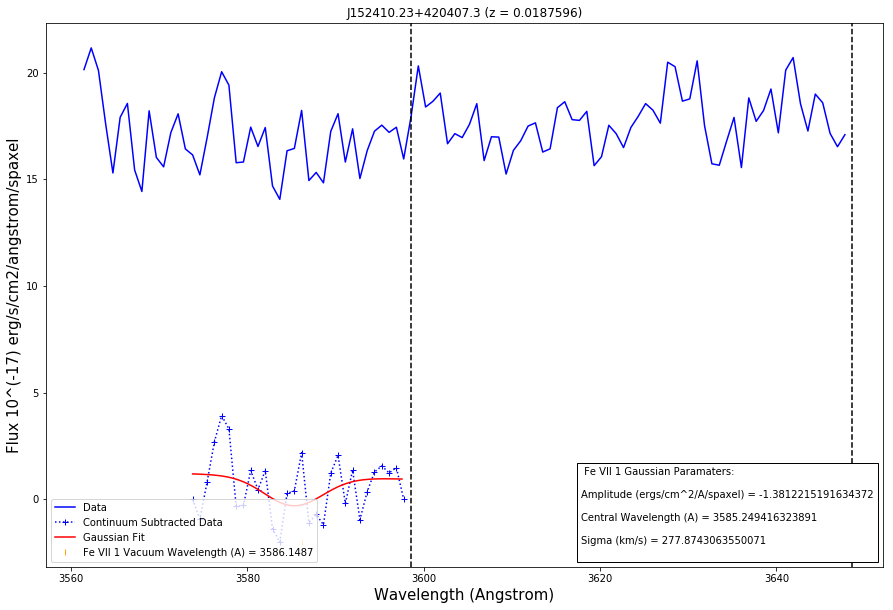

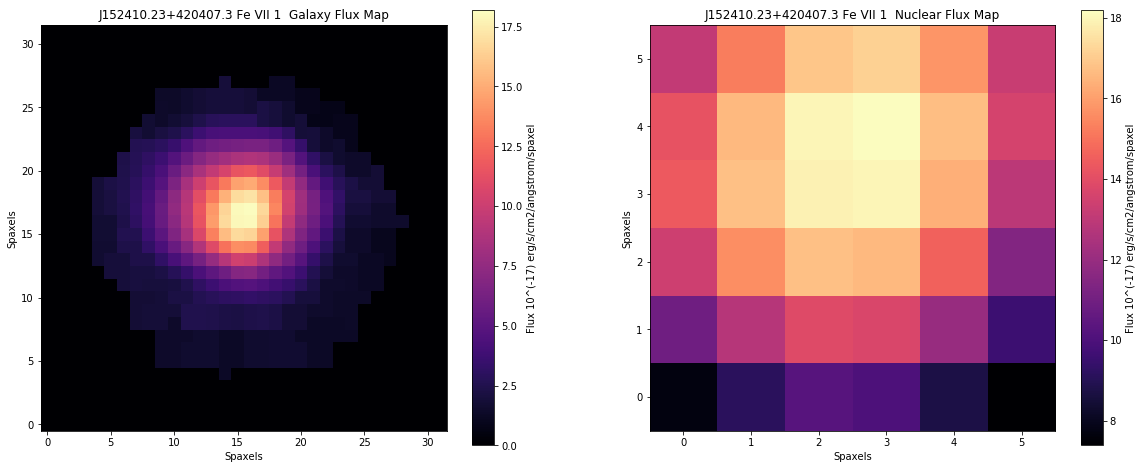

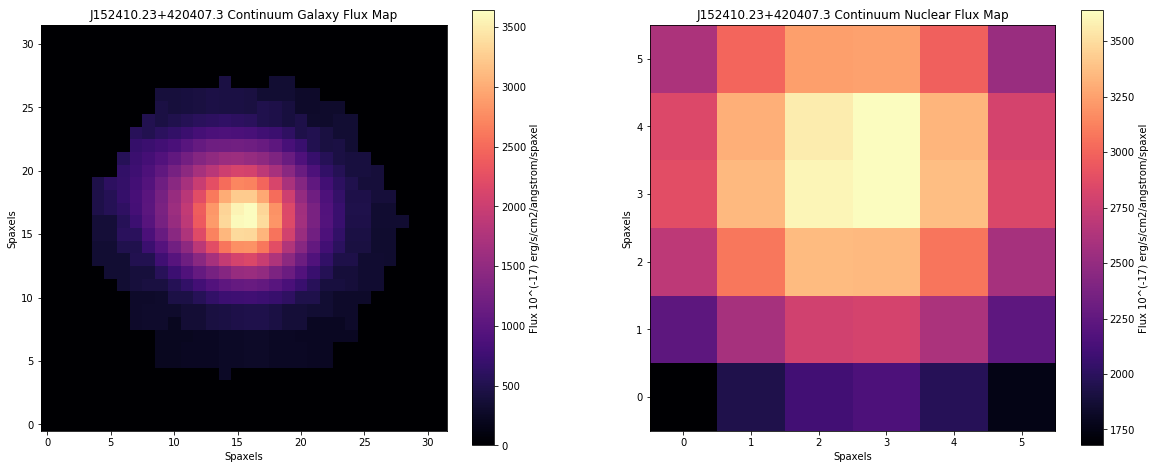

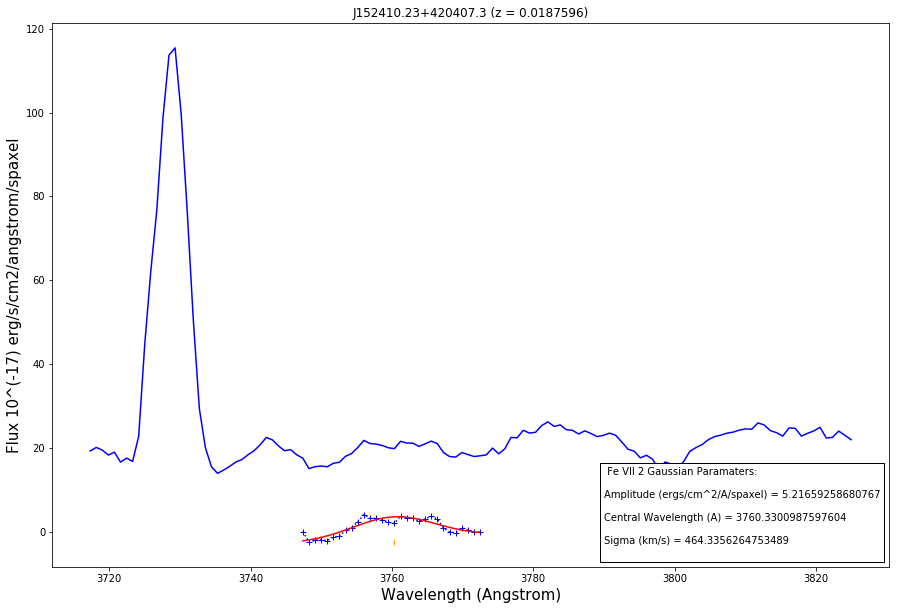

In [2]:
counter = 0
for plate in chain(range (7443, 7444, 1), range (7495, 7496, 1), range(7815,7816, 1), range(7957,7993, 1), range(8077,8087, 1), 
                   range(8131,8159, 1), range(8239, 8275, 1), range(8309, 8487, 1),
                   range(8547, 8656, 1), range(8711, 8729, 1), range(8931, 9096, 1),
                   range(9181, 9197, 1), range(9485, 9513, 1), range(9863, 9892, 1), range(10001, 10002, 1)):
    #                      range(9673, 9679, 1),                      

    for ifu in chain(range (1901,1903, 1), range(3701, 3705, 1), 
                     range (6101, 6105, 1), range(9101, 9103, 1), range(12701, 12706, 1)):

        os.system('rsync -avz --password-file=rsync_pass rsync://sdss@dtn01.sdss.'
                  'utah.edu/sas/mangawork/manga/spectro/analysis/MPL-7/VOR10-GAU-MILESHC/'
                  +str(plate)+'/'+str(ifu)+'/manga-'+str(plate)+'-'+str(ifu)
                  +'-LOGCUBE-VOR10-GAU-MILESHC.fits.gz output/')
#         os.system('rsync -avz --password-file=rsync_pass rsync://sdss@dtn01.sdss.'
#                   'utah.edu/sas/mangawork/manga/spectro/analysis/MPL-7/VOR10-GAU-MILESHC/'
#                   +str(plate)+'/'+str(ifu)+'/manga-'+str(plate)+'-'+str(ifu)
#                   +'-MAPS-VOR10-GAfU-MILESHC.fits.gz Test/')
        os.system('gunzip output/manga-'+str(plate)+'-'+str(ifu)+'-LOGCUBE-VOR10-GAU-MILESHC.fits.gz')
# #       os.system('gunzip Test/manga-'+str(plate)+'-'+str(ifu)+'-MAPS-VOR10-GAU-MILESHC.fits.gz')
        def emission(emline, number, number2, name2, name6, name8, number10):
            for fitsName in glob.glob('output/*.fits'):
                
                hdulist = fits.open(fitsName) 
                wavelength_import = hdulist[4].data #Importing Wavelength Values
                flux_import = hdulist[1].data
                
                drpall = fits.open('drpall-v2_4_3.fits') #Opening drpall file
                tbdata = drpall[1].data #Accessing drpall data
                ind = np.where(tbdata['mangaid'] == str(hdulist[0].header[59])) #Finding MaNGA ID
                iau = tbdata['nsa_iauname'][ind][0] #Finding SDSS Name
                plateifu1 = tbdata['plateifu'][ind][0]
                
                #if tbdata['z'][ind][0] > 0.0821073:
                wavelength = wavelength_import/(tbdata['z'][ind][0] + 1)
                
                index1,index2,index3 = flux_import.shape
                cp = int(index2/2)
                cp_down = cp-3
                cp_up = cp+3
                pd = int(index3/2)
                p_down = pd-3
                p_up = pd+3
                
                #Nuclear region flux
                flux_nuclear_dimensions = flux_import[:,cp_down:cp_up,p_down:p_up]
                flux_nuclear_sum = flux_nuclear_dimensions.sum(axis = (0))
                flux = flux_nuclear_dimensions.sum(axis = (1, 2))
                
                #Galaxy flux
                flux_galaxy = flux_import.sum(axis = (0))
                flux_galaxy_1d = flux_import.sum(axis = (1,2))
                
                #Defining neighboring wavelengths
                wavelength_absolute = np.abs(wavelength - emline) 
                wavelength_min = np.argmin(wavelength_absolute)
                                                
                wavelength_oi2 = np.abs(wavelength - OI_2) 
                wavelength_min_oi2 = np.argmin(wavelength_oi2)
                wavelength_oii1 = np.abs(wavelength - OII_1) 
                wavelength_min_oii1 = np.argmin(wavelength_oii1)
                wavelength_oii2 = np.abs(wavelength - OII_2) 
                wavelength_min_oii2 = np.argmin(wavelength_oii2)
                wavelength_oiii3 = np.abs(wavelength - OIII_3) 
                wavelength_min_oiii3 = np.argmin(wavelength_oiii3)
                #Determining observed (for vmeasured value)
            #         lambda_obs = (tbdata['z'][ind][0] + 1)*emline
            #         wavelength_absolute = np.abs(wavelength - lambda_obs) 
            #         wavelength_min = np.argmin(wavelength_absolute)

                #Spectrum parameters
                y_0, y_1 = wavelength_min - number, wavelength_min + number #Setting lower/ upper bound for linear fit
                z_0, z_1 = wavelength_min - number10, wavelength_min + number10 #Setting lower/ upper bound for linear fit
                if y_0 < 0:
                    y_0 = 0
                if z_0 < 0:
                    z_0 = 0
                wavelength_range, wavelength_scope = wavelength[y_0:y_1], wavelength[z_0:z_1] 
                flux_scope, flux_range = flux[z_0:z_1], flux[y_0:y_1]

                #Performing linear fit
                l_i = number2 #Bounds of fit
                x_0 = wavelength_min - l_i #Setting lower bound for linear fit
                if x_0 < 0:
                    x_0 = 0
                x_1 = wavelength_min + l_i #Setting upper bound for linear fit
                x_1_2 = x_1 + 2*l_i
                x_1_4 = x_1_2 + 2*l_i
                wavelength_bounds = wavelength[x_0:x_1] #Inputting bounds into wavelength array
                #Masking all but first and last values of the array
                wavelength_mask = np.ma.masked_array(wavelength_bounds,
                                                     (wavelength_bounds != wavelength_bounds[1])& 
                                                     (wavelength_bounds != wavelength_bounds[-1])) 
                #Compressing the array to only fit using the two values
                wavelength_compressed = wavelength_mask.compressed() 
                flux_bounds = flux[x_0:x_1] #Determining flux window for linear fit
                #Selecting two points for linear fit
                flux_mask = np.ma.masked_array(flux_bounds, (flux_bounds != flux_bounds[0]) 
                                           & (flux_bounds != flux_bounds[-1]))
                flux_compressed = flux_mask.compressed() #Compressing the data
                if flux_compressed[0] != 0:
                    polyfit = np.polyfit(wavelength_compressed,flux_compressed, 1) #Fitting the line to the data
                    fit = np.poly1d(polyfit)
                    flux_linear = fit[1]*wavelength_bounds + fit[0] #Determining linear fit parameters
                    flux_correction = flux_bounds - flux_linear #Correcting for continuum
                 
                    flux_sigma_bounds_1 = flux[x_1: x_1_2]
                    flux_sigma_bounds_2 = flux[x_1_2: x_1_4]
                    f_std = np.std(flux_sigma_bounds_1)
                    f_std_2 = np.std(flux_sigma_bounds_2)
                    flux_sigma_average = (f_std + f_std_2)/2
                    flux_sigma = 0*(flux_sigma_average)
                    k = flux_correction.shape[0]
                    k_i = int(k/2)
                    #print (k_i)
                    print (name2, '\n', 'MaNGA ID = ' + fitsName[13:23],
                           '\n', 'Sigma Threshold (ergs/cm^2/A/spaxel) = ' + str(flux_sigma), '\n',
                           'Peak Flux (ergs/cm^2/A/spaxel) = ' + str(flux_correction[k_i]), '\n')

                    if flux_correction[k_i] > flux_sigma:
                        def gaus(x,amp,x0,sigma, m, c):
                            return amp*np.exp(-(x-x0)**2/(2*sigma**2)) + m*x + c #Defining Gaussian function
                        for i in flux_correction[k_i:]:
                            if i < 0.659*flux_correction[k_i]:
                                s = np.abs(flux_correction - i)
                                s2 = np.argmin(s)
                                sigma_test = wavelength_bounds[s2] - wavelength_bounds[k_i]
                                break
                        #print ('wavelength sigma = ' + str(sigma_test))
                        amplitude = np.argmax(flux_correction) #Making amplitude prediction
                        central_wavelength = wavelength[wavelength_min] #Making central wavelength prediction
                        offset = np.argmin(flux_bounds) #Making offset prediction
                        p_i = wavelength_bounds.shape[0]
    #                     print (p_i)
                        wavelength_test = np.arange(wavelength_bounds[0],wavelength_bounds[p_i-1], 0.25)
                        popt, pcov = curve_fit(gaus,wavelength_bounds, #Inputting predictions into fit
                                           flux_correction,  
                                           p0=[flux_correction[amplitude], 
                                               central_wavelength, sigma_test, fit[1], fit[0]])

                        velocity_meas = c*((popt[1] - emline)/emline)
                        velocity_sys = c*tbdata['z'][ind][0]
                        velocity_off = velocity_sys - velocity_meas
                        sigma = c*(popt[2]/emline)


                #             f= open(str(name8) + ".txt","a+")
                #             f.write('\t' + fitsName[11:-31] +'\t' + str(round(tbdata['z'][ind][0],3)) + '\t' +
                #                     str(round(popt[0],3)) + '\t' + str(round(velocity_meas, 3)) + '\t' +
                #                     str(round(velocity_sys,3)) + '\t' + str(round(velocity_off,3)) + '\t'
                #                     + str(round(sigma,3)) + '\n') 
                #             f.close() 

                        anchored_gaussian = AnchoredText(name2 + 
                                                         'Gaussian Paramaters:' + '\n' +
                                                         '\n' + 'Amplitude (ergs/cm^2/A/spaxel) = ' + str(popt[0]) 
                                               + '\n' + '\n' + 'Central Wavelength (A) = ' + str(popt[1]) 
                                               + '\n' + '\n' + 'Sigma (km/s) = ' + str(sigma) + '\n' 
                                               , loc=4)
                        sigma_threshold = ((2000/2.355)/c)*(wavelength[wavelength_min])
                        print (' Gaussian Sigma (km/s) = ' + str(sigma))

                        #Wavelength vs Flux

                        if sigma > 50 and sigma < 500:
                        #if popt[2] > sigma_threshold:
                            #Assigning folder for each Manga galaxy in desired directory 
                                newpath = r'/Users/jamesnegus/Google Drive/Academic/CU/Research/manga/primary_code/output/5_sigma_2000_FWHM_Gau/%s/'%name8 + '%s/'%iau
                                if not os.path.exists(newpath):
                                    os.makedirs(newpath)
                                f = open(newpath + "gaussian.csv","w+")
                                f.write('Amplitude (ergs/cm^2/A/spaxel)' + ','+ 'Sigma (km/s)' + ',' + 'Measured Velocity(km/s)' +
                                        '\n' + str(popt[0])+ ','  + str(sigma) + ','  + str(velocity_meas))
    #                             f.close()
                                marker = np.argmin(flux_correction)
                                plt.figure(figsize=(15,10))
                                plt.plot(wavelength[z_0:x_1_4], flux[z_0:x_1_4], 'b', label = 'Data')
                                plt.plot(wavelength_range, flux_correction, 'b+:', label = 'Continuum Subtracted Data')
                                plt.title(iau + ' (z = ' 
                                          + str(tbdata['z'][ind][0]) + ')')
                                plt.ylabel('Flux 10^(-17) erg/s/cm2/angstrom/spaxel', fontsize = 15)
                                plt.xlabel('Wavelength (Angstrom)', fontsize = 15)
                                plt.gca().add_artist(anchored_gaussian)
                                plt.plot(wavelength_test, 
                                         gaus(wavelength_test, *popt), 'r-', label = 'Gaussian Fit')
                                plt.plot(wavelength[wavelength_min], flux_correction[marker], marker = '|', color = 'orange', linestyle='None', label = name6 + 'Vacuum Wavelength (A) = ' 
                                            + str(wavelength[wavelength_min]))
                                if emline == Fe_VII_2:
                                    plt.plot(wavelength[wavelength_min_oii1],wavelength[marker], marker='|', color = 'green', linestyle='None', label = ' OII_1 Vacuum Wavelength(A) = ' 
                                             + str(wavelength[wavelength_min_oii1], linestyle='None'))
                                    plt.plot(wavelength[wavelength_min_oii2],wavelength[marker], marker='|', color = 'magenta', linestyle='None', label = ' OII_2 Vacuum Wavelength(A) = ' 
                                             + str(wavelength[wavelength_min_oii2]))
                                if emline == Fe_X:
                                    plt.plot(wavelength[wavelength_min_oi2],flux_correction[marker], marker='|', color = 'yellow', linestyle='None', label = 'OI_1 Vacuum Wavelength(A) ='
                                             + str(wavelength[wavelength_min_oi2]))
                                if emline == OIII_4:
                                    plt.plot(wavelength[wavelength_min_oiii3],flux_correction[marker], marker='|', color = 'purple', linestyle='None', label =' OIII_3 Vacuum Wavelength(A) =' 
                                             + str(wavelength[wavelength_min_oiii3]))

                                plt.axvline(x = wavelength[x_1], linestyle = '--', color = 'k')
                                plt.axvline(x = wavelength[x_1_4], linestyle = '--', color = 'k')
                               # plt.xlim(wavelength[z_0],wavelength[z_1] - 1)
                                plt.legend(loc = 5)

                                plt.savefig(newpath + iau + '_' + name8 + '.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
                                #plt.show()

                                #Emission Line Flux Maps
                                f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20,8))
                                cax1 = ax1.imshow(flux_import[y_0:y_1, :, :].sum(axis = 0), cmap='magma', origin = 'lower')
                                ax1.set_title(iau  + name2 + ' Galaxy Flux Map')
                                ax1.set_xlabel('Spaxels')
                                ax1.set_ylabel('Spaxels')
                                f.colorbar(cax1, ax = ax1, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
                                cax2 = ax2.imshow(flux_nuclear_dimensions[y_0:y_1, :, :].sum(axis = (0)), cmap='magma', origin = 'lower')
                                ax2.set_title(iau  + name2 + ' Nuclear Flux Map')
                                ax2.set_xlabel('Spaxels')
                                ax2.set_ylabel('Spaxels')
                                f.colorbar(cax2, ax = ax2, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
                                f.savefig(newpath +  iau + '_' + 'emission_line_flux_maps.png', dpi=600, format='png', bbox_inches='tight', pad_inches = 0)
                                #plt.show()
    
                                #Continuum Flux Maps
    
                                f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20,8))
                                cax1 = ax1.imshow(flux_galaxy, cmap='magma', origin = 'lower')
                                ax1.set_title(iau + ' Continuum Galaxy Flux Map')
                                ax1.set_xlabel('Spaxels')
                                ax1.set_ylabel('Spaxels')
                                f.colorbar(cax1, ax = ax1, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
                                cax2 = ax2.imshow(flux_nuclear_sum, cmap='magma', origin = 'lower')
                                ax2.set_title(iau + ' Continuum Nuclear Flux Map')
                                ax2.set_xlabel('Spaxels')
                                ax2.set_ylabel('Spaxels')
                                f.colorbar(cax2, ax = ax2, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
                                f.savefig(newpath +  iau + '_' + 'continuum_flux_maps.png', dpi=600, format='png', bbox_inches='tight', pad_inches = 0)
                                #plt.show()


                                 # get a map
                                #maps = Maps(plateifu=plateifu1)

                                # make a standard 3-plot BPT and retrieve the classifications
                                #masks, fig, axes = maps.get_bpt()

                                # save the plot
                                #fig.savefig(dir + iau + '_' + '3_plot_bpt.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)

    #                             # make a BPT classification without OI
    #                             masks, fig, axes = maps.get_bpt(use_oi=False)
    #                             # save the plot
    #                             fig.savefig(dir + iau + 'no_OI_bpt.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)


            return;
            

        # Calling the function
        emission(emline = Fe_VII_1, 
                 number = 15, 
                 number2 = 15, 
                 name2 = ' Fe VII 1 ', 
                 name6 = 'Fe VII 1 ',
                 name8 = 'FeVII1',
                 number10 = 30)
        emission(emline = Fe_VII_2, 
                 number = 15, 
                 number2 = 15,  
                 name2 = ' Fe VII 2 ', 
                 name6 = 'Fe VII 2 ',
                 name8 = 'FeVII2',
                 number10 = 50)
        emission(emline = Fe_VII_3, 
                number = 15, 
                number2 = 15, 
                name2 = ' Fe VII 3 ', 
                name6 = 'Fe VII 3 ',
                name8 = 'FeVII3',
                number10 = 50)
        emission(emline = Fe_X, 
                number = 15, 
                number2 = 15,  
                name2 = ' Fe X ', 
                name6 = 'Fe X ',
                name8 = 'FeX',
                number10 = 50)
        # emission(emline = Ne_V, 
        #          number = 15, 
        #          number2 = 15,  
        #          name2 = ' Ne V ', 
        #          name6 = 'Ne V ',
        #          name8 = 'NeV',
        #          number10 = 50)
#         emission(emline = H_Beta, 
#                 number = 15, 
#                 number2 = 15, 
#                 name2 = ' H-Beta ', 
#                 name6 = 'H-Beta ', 
#                 name8 = 'HBeta',
#                 number10 = 50)
#         emission(emline = OIII_4, 
#                 number = 15, 
#                 number2 = 15, 
#                 name2 = ' OIII_4 ', 
#                 name6 = 'OIII_4 ',
#                 name8 = 'OIII_4',
#                 number10 = 50)
        
        for fitsName in glob.glob('output/*.fits'):
            counter += 1
            print (' ' + str(counter) + '\n') 
            os.remove(fitsName)                    



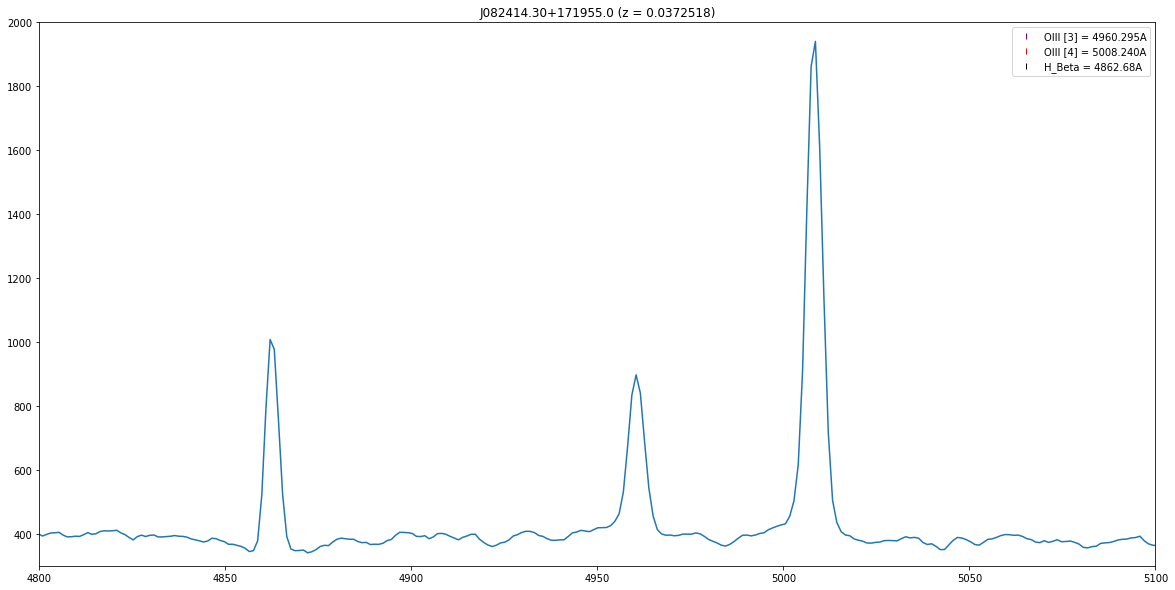

5008.5938 1567
(4563, 54, 54)


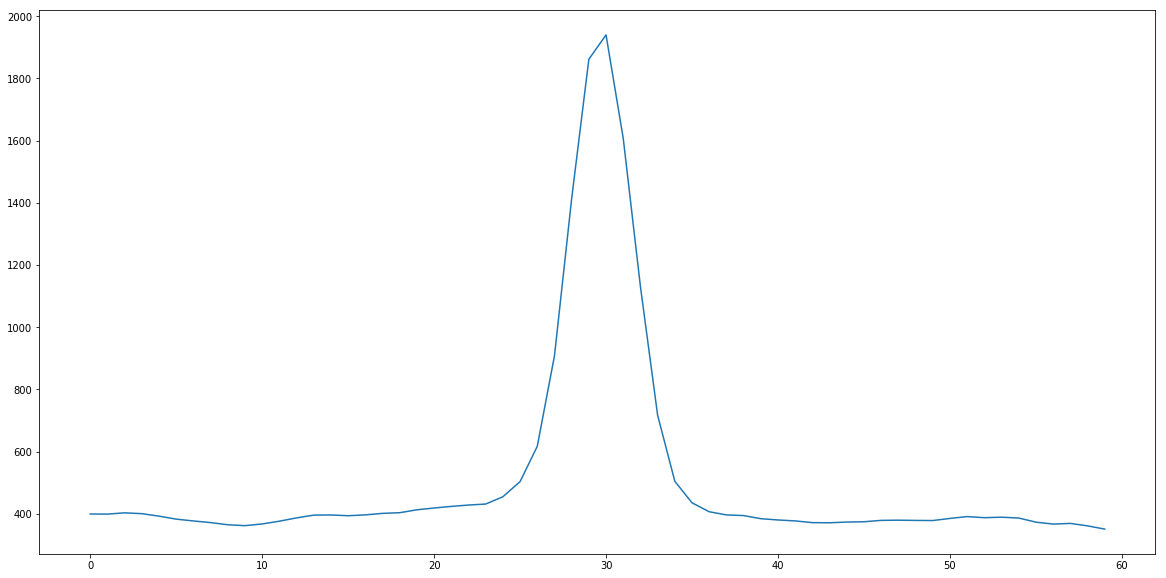

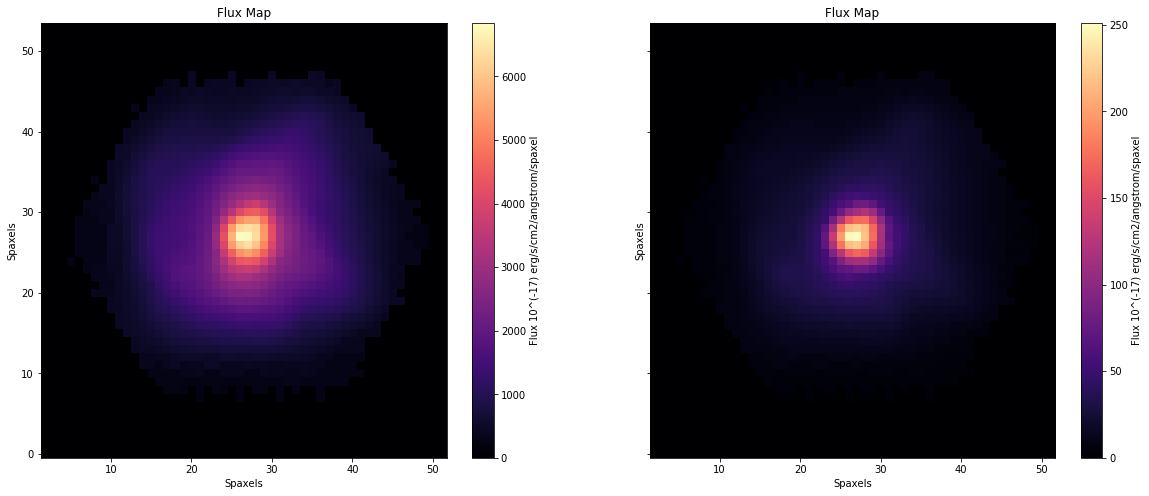

In [17]:
hdulist = fits.open('manga-8241-6102-LOGCUBE-VOR10-GAU-MILESHC.fits') #Opening fits file
# flux = hdulist[1].data.sum(axis = (1,2)) #Importing Flux Values 
flux = hdulist[1].data #Importing Flux Values 
wavelength_raw = hdulist[4].data #Importing Wavelength Values
drpall = fits.open('drpall-v2_4_3.fits') #Opening drpall file
tbdata = drpall[1].data #Accessing drpall data
ind = np.where(tbdata['mangaid'] == str(hdulist[0].header[59])) #Finding MaNGA ID
iau = tbdata['nsa_iauname'][ind][0] 
wavelength = wavelength_raw/(tbdata['z'][ind][0] + 1)
c = 299792 #speed of light km/s 

hdulist.close()
drpall.close()

i,o,p = flux.shape
cp = int(o/2)
cp_down = cp-3
cp_up = cp+3
p = int(p/2)
p_down = p-3
p_up = p+3
#print (cp_down, cp_up, p_down, p_up)

y = flux[:,cp_down:cp_up,p_down:p_up]
test2 = y.sum(axis = (1, 2))
test32 = flux.sum(axis = (1, 2))
plt.figure(figsize=(20,10))
plt.plot (wavelength, test32)
plt.title(iau + ' (z = ' + str(tbdata['z'][ind][0]) + ')')
plt.xlim(4800,5100)
plt.ylim(300,2000)
plt.plot(4960.295,40, marker='|', color = 'purple', label = "OIII [3] = 4960.295A", linestyle='None')
plt.plot(5008.240,40, marker='|', color = 'red', label = "OIII [4] = 5008.240A", linestyle='None')
plt.plot(4862.68,40, marker='|', color = 'black', label = "H_Beta = 4862.68A", linestyle='None')
plt.legend()
plt.show()

# plt.xlim(5900,6350)
# plt.ylim(40,75)
# # plt.plot(4960.295,40, marker='|', color = 'purple', label = "OIII [3] = 4960.295A", linestyle='None')
# plt.plot(6302.046,42, marker='|', color = 'red', label = "OI_1 = 6302.046", linestyle='None')
# plt.plot(6086,42, marker='|', color = 'black', label = "Fe_VII_3 = 6086A", linestyle='None')
# plt.legend()
# plt.show()


#q = np.where(wavelength = )
test3 = abs(wavelength - OIII_4)
test_min = np.argmin(test3) 
print(wavelength[test_min], test_min)
#print (test3)
# print (wavelength[1555], wavelength[1579])
# print (wavelength[1580] - wavelength[1554])
po = flux[25:54, :, :].sum(axis = 0)
#print (po.shape)
#flux_galaxy = flux_import.sum(axis = (0))
print (flux.shape)
test = flux[:, :, :].sum(axis = (0))
u,a = test_min - 30, test_min + 30
#print (u, a)
test54 = flux[u:a, :, :].sum(axis = (0))
# #print (flux.shape)
# #print (wavelength.shape)

plt.figure(figsize=(20,10))
plt.plot (test32[u:a])
plt.show()

#fig = plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(20,8))
cax1 = ax1.imshow(test, cmap='magma', origin = 'lower')
ax1.set_title('Flux Map')
ax1.set_xlabel('Spaxels')
ax1.set_ylabel('Spaxels')
f.colorbar(cax1, ax = ax1, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
#f.colorbar.set_label('Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
cax2 = ax2.imshow(test54, cmap='magma', origin = 'lower')
ax2.set_title('Flux Map')
ax2.set_xlabel('Spaxels')
ax2.set_ylabel('Spaxels')
f.colorbar(cax2, ax = ax2, label = 'Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
f.savefig('nuclear_flux_map.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)


The LOGCUBE files provide the binned spectra and the best-fitting model spectrum for each spectrum that was successfully fit. These files are useful for detailed assessments of the model parameters because they allow you to return to the spectra and compare the model against the data.

The DAP fits the spectra in two stages, one to get the stellar kinematics and the second to determine the emission-line properties. The emission-line module (used for all binning schemes) fits both the stellar continuum and the emission lines at the same time, where the stellar kinematics are fixed by the first fit. The difference between the stellar-continuum fit during the first and second fit are provided by the EMLINE_BASE extension. I.e., if you want to get the stellar-continuum models from the first fit, you calculate:

stellar_continuum = MODEL - EMLINE - EMLINE_BASE

Primary - Empty extension with primary header information.

Flux (10^(-17) erg/s/cm2/angstrom/spaxel) - Flux of the binned spectra.

IVAR - Inverse variance in the binned spectra.

MASK - Bitmask for the binned and model spectra.

WAVE (Angstrom) - Vacuum-wavelength vector.

REDCORR - Reddening correction applied during the fitting procedures; dereddened_flux = FLUX * REDCORR.

MODEL (10^(-17) erg/s/cm2/angstrom/spaxel) - The best fitting model spectra (sum of the fitted continuum and emission-line models).

EMLINE (10^(-17) erg/s/cm2/angstrom/spaxel) - The model spectrum with only the emission lines.

EMLINE_BASE	(10^(-17) erg/s/cm2/angstrom/spaxel) - The adjustment to the stellar continuum made during the combined continuum + emission-line fit.

EMLINE_MASK - The bitmask that only applies to the emission-line modeling.

BINID - Numerical ID for spatial bins in 5 channels: (1) binned spectra, (2) stellar-continuum results, (3) empty, (4) emission-line model results, and (5) empty; i.e., channels 1, 2, and 4 are the same as the BINID extension in the MAPS files and channels 3 and 5 are empty.



In [ ]:
#Creating .txt file for table that lists emission line parameters
#for fitsName in glob.glob('cg/vor10/*.fits'):

# def emission_1(em):
#     f= open(str(em) + ".txt","a+")
#     f.write(em + '\n' + 'SDSS Name' + '\t' + 'MaNGA ID' + '\t' + 'z' 
#             + '\t' + 'Flux (erg/s/cm2/A/spaxel)' + '\t' + 
#             'V_meas (km/s)' + '\t' + 'V_sys (km/s)' 
#             + '\t' + 'V_off (km/s)' + '\t' + 'Sigma (km/s)' + '\n')
#     f.close()
#     return;
# emission_1(em = 'HBeta')
# emission_1(em = 'OIII')
# emission_1(em = 'FeVII1')
# emission_1(em = 'FeVII2')
# emission_1(em = 'FeVII3')
# emission_1(em = 'FeX')

#Assigning folder for each Manga galaxy in desired directory 
# for fitsName in glob.glob('test/*LOGCUBE-VOR10-GAU-MILESHC.fits'):
#     newpath = r'/Users/jmsnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/wavelength_vs_flux/1_sigma_2000_FWHM/%s/' % fitsName[11:-31] 
#     if not os.path.exists(newpath):
#         os.makedirs(newpath)

# for fitsName in glob.glob('test/*LOGCUBE-VOR10-GAU-MILESHC.fits'):
#     newpath_v = r'/Users/jmsnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/velocity_vs_flux/1_sigma_2000_FWHM/%s/' % fitsName[11:-31] 
#     if not os.path.exists(newpath_v):
#         os.makedirs(newpath_v)

In [ ]:
# #For loop to import all galaxies in desired directory

# for plate in range (7443, 7816, 1): 
#     for ifu in chain(range (1901,1903, 1), range(3701, 3705, 1), range (6101, 6105, 1), 
#                      range(9101, 9103, 1),range(12701, 12706, 1) ):
#         os.system('rsync -avz --password-file=rsync_pass rsync://sdss@dtn01.sdss.'
#                   'utah.edu/sas/mangawork/manga/spectro/analysis/MPL-7/VOR10-GAU-MILESHC/'
#                   +str(plate)+'/'+str(ifu)+'/manga-'+str(plate)+'-'+str(ifu)
#                   +'-LOGCUBE-VOR10-GAU-MILESHC.fits.gz Test/')
# #         os.system('rsync -avz --password-file=rsync_pass rsync://sdss@dtn01.sdss.'
# #                   'utah.edu/sas/mangawork/manga/spectro/analysis/MPL-7/VOR10-GAU-MILESHC/'
# #                   +str(plate)+'/'+str(ifu)+'/manga-'+str(plate)+'-'+str(ifu)
# #                   +'-MAPS-VOR10-GAU-MILESHC.fits.gz Test/')
#         os.system('gunzip Test/manga-'+str(plate)+'-'+str(ifu)+'-LOGCUBE-VOR10-GAU-MILESHC.fits.gz')
# # #         os.system('gunzip Test/manga-'+str(plate)+'-'+str(ifu)+'-MAPS-VOR10-GAU-MILESHC.fits.gz')

for fitsName in glob.glob('test/*LOGCUBE-VOR10-GAU-MILESHC.fits'):
    hdulist = fits.open(fitsName) #Opening fits file
    flux = hdulist[1].data.sum(axis = (1,2)) #Importing Flux Values 
    wavelength_1 = hdulist[4].data #Importing Wavelength Values
    drpall = fits.open('drpall-v2_4_3.fits') #Opening drpall file
    tbdata = drpall[1].data #Accessing drpall data
    ind = np.where(tbdata['mangaid'] == str(hdulist[0].header[59])) #Finding MaNGA ID
    c = 299792 #speed of light km/s 
    #print (tbdata['nsa_iauname'][ind][0])
        
    # Defining emission line function

    def emission(emline, number, number2, name2, name6, name8, number10):
        if tbdata['z'][ind][0] > 0.0821073:
            wavelength = wavelength_1/(tbdata['z'][ind][0] + 1)
            #wavelength = hdulist[4].data
            wavelength_absolute = np.abs(wavelength - emline) 
            wavelength_min = np.argmin(wavelength_absolute) 

            #Defining neighboring wavelengths
            wavelength_oi2 = np.abs(wavelength - OI_2) 
            wavelength_min_oi2 = np.argmin(wavelength_oi2)
            wavelength_oii1 = np.abs(wavelength - OII_1) 
            wavelength_min_oii1 = np.argmin(wavelength_oii1)
            wavelength_oii2 = np.abs(wavelength - OII_2) 
            wavelength_min_oii2 = np.argmin(wavelength_oii2)
            wavelength_oiii3 = np.abs(wavelength - OIII_3) 
            wavelength_min_oiii3 = np.argmin(wavelength_oiii3)

            #Determining observed (for vmeasured value)
    #         lambda_obs = (tbdata['z'][ind][0] + 1)*emline
    #         wavelength_absolute = np.abs(wavelength - lambda_obs) 
    #         wavelength_min = np.argmin(wavelength_absolute)

            #Spectrum parameters
            w_i = number #Bounds of fit
            z_i = number10 #Wider fit
            y_0 = wavelength_min - w_i #Setting lower bound for linear fit
            y_1 = wavelength_min + w_i #Setting upper bound for linear fit
            z_0 = wavelength_min - z_i #Setting lower bound for linear fit
            z_1 = wavelength_min + z_i #Setting upper bound for linear fit
            wavelength_range = wavelength[y_0:y_1] #Setting range for values to plot
            wavelength_scope = wavelength[z_0:z_1]
            flux_scope = flux[z_0:z_1]
            flux_range = flux[y_0:y_1] #Setting range for values to plot

            #Performing linear fit
            l_i = number2 #Bounds of fit
            x_0 = wavelength_min - l_i #Setting lower bound for linear fit
            x_1 = wavelength_min + l_i #Setting upper bound for linear fit
            wavelength_bounds = wavelength[x_0:x_1] #Inputting bounds into wavelength array
            wavelength_mask = np.ma.masked_array(wavelength_bounds, 
                                                 (wavelength_bounds != wavelength_bounds[0]) 
                                             & (wavelength_bounds != wavelength_bounds[-1])) #Masking all but first and last values of the array
            wavelength_compressed = wavelength_mask.compressed() #Compressing the array to only fit using the two values
            flux_bounds = flux[x_0:x_1] #Determining flux window for linear fit
            flux_mask = np.ma.masked_array(flux_bounds, (flux_bounds != flux_bounds[0]) #Selecting two points for linear fit.
                                       & (flux_bounds != flux_bounds[-1]))
            flux_compressed = flux_mask.compressed() #Compressing the data
            polyfit = np.polyfit(wavelength_compressed,flux_compressed, 1) #Fitting the line to the data
            fit = np.poly1d(polyfit)
            flux_linear = fit[1]*wavelength_bounds + fit[0] #Determining linear fit parameters
            flux_correction = flux_bounds - flux_linear #Correcting for continuum

            x_1_2 = x_1 + 2*l_i
            x_1_4 = x_1_2 + 2*l_i
            flux_sigma_bounds_1 = flux[x_1: x_1_2]
            flux_sigma_bounds_2 = flux[x_1_2: x_1_4]
            f_std = np.std(flux_sigma_bounds_1)
            f_std_2 = np.std(flux_sigma_bounds_2)
            flux_sigma_average = (f_std + f_std_2)/2
            flux_sigma = 3*(flux_sigma_average)

            if flux_correction[l_i] > flux_sigma:
                #Performing Gaussian fit wavelength
                def gaus(x,amp,x0,sigma, m, c):
                    return amp*np.exp(-(x-x0)**2/(2*sigma**2)) + m*x + c #Defining Gaussian function
                for i in flux_correction[l_i:]:
                    if i < 0.659*flux_correction[l_i]:
                        s = np.abs(flux_correction - i)
                        s2 = np.argmin(s)
                        sigma_test = wavelength_bounds[s2] - wavelength_bounds[l_i]
                        break
                amplitude = np.argmax(flux_correction) #Making amplitude prediction
                central_wavelength = wavelength[wavelength_min] #Making central wavelength prediction
                offset = np.argmin(flux_bounds) #Making offset prediction
                wavelength_test = np.arange(wavelength_bounds[0],wavelength_bounds[29], 0.25)
                popt, pcov = curve_fit(gaus,wavelength_bounds, #Inputting predictions into fit
                                   flux_correction, 
                                   p0=[flux_correction[amplitude], 
                                       central_wavelength, sigma_test, fit[1], fit[0]])

                velocity_meas = c*((popt[1] - emline)/emline)
                velocity_sys = c*tbdata['z'][ind][0]
                velocity_off = velocity_sys - velocity_meas
                sigma = c*(popt[2]/emline)
        
        #             f= open(str(name8) + ".txt","a+")
        #             f.write('\t' + fitsName[11:-31] +'\t' + str(round(tbdata['z'][ind][0],3)) + '\t' +
        #                     str(round(popt[0],3)) + '\t' + str(round(velocity_meas, 3)) + '\t' +
        #                     str(round(velocity_sys,3)) + '\t' + str(round(velocity_off,3)) + '\t'
        #                     + str(round(sigma,3)) + '\n') 
        #             f.close() 

                anchored_gaussian = AnchoredText(name2 + 
                                                 'Gaussian Paramaters:' + '\n' +
                                                 '\n' + 'Amplitude = ' + str(popt[0]) 
                                       + '\n' + '\n' + 'Central Wavelength = ' + str(popt[1]) 
                                       + '\n' + '\n' + 'Sigma = ' + str(popt[2]) + '\n' 
                                       , loc=4)
                #Wavelength vs Flux
                sigma_threshold = ((2000/2.355)/c)*(wavelength[wavelength_min])
                if popt[2] < sigma_threshold:
            #         #Assigning folder for each Manga galaxy in desired directory 
            #             newpath = r'/Users/jamesnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/wavelength_vs_flux/no_threshold/%s/' % tbdata['nsa_iauname'][ind][0] 
            #             if not os.path.exists(newpath):
            #                 os.makedirs(newpath)
                        plt.figure(figsize=(15,10))
                        plt.plot(wavelength_scope, flux_scope, 'b', label = 'Data')
                        plt.plot(wavelength_range, flux_correction, 'b+:', label = 'Data Within Gaussian Window')
                        plt.title(tbdata['nsa_iauname'][ind][0] + ' Corrected ' + name2 
                                  + 'Emission Line with Guassian Fit' + ' (z = ' 
                                  + str(tbdata['z'][ind][0]) + ')')
                        plt.ylabel('Flux 10^(-17) erg/s/cm2/angstrom/spaxel', fontsize = 15)
                        plt.xlabel('Wavelength (Angstrom)', fontsize = 15)
                        plt.gca().add_artist(anchored_gaussian)
                        plt.plot(wavelength_test, 
                                 gaus(wavelength_test, *popt), 'r-', label = 'Gaussian Fit')
                        plt.axvline(x = wavelength[wavelength_min], color = 'k', label = name2 + ' Vacuum Wavelength(A) - ' 
                                    + str(wavelength[wavelength_min]))
                        if emline == Fe_X:
                            plt.axvline(x = wavelength[wavelength_min_oi2], color = 'y', label = ' OI_1 Vacuum Wavelength(A) - ' 
                                    + str(wavelength[wavelength_min_oi2]))
                        if emline == OIII_4:
                            plt.axvline(x = wavelength[wavelength_min_oiii3], color = 'c', label = ' OIII_3 Vacuum Wavelength(A) - ' 
                                    + str(wavelength[wavelength_min_oiii3]))
                        if emline == Fe_VII_2:
                            plt.axvline(x = wavelength[wavelength_min_oii1], color = 'g', label = ' OII_1 Vacuum Wavelength(A) - ' 
                                    + str(wavelength[wavelength_min_oii1]))
                            plt.axvline(x = wavelength[wavelength_min_oii2], color = 'm', label = ' OII_2 Vacuum Wavelength(A) - ' 
                                    + str(wavelength[wavelength_min_oii2]))
                        plt.axvline(x = wavelength[x_0], linestyle = '--', color = 'k')
                        plt.axvline(x = wavelength[x_1-1], linestyle = '--', color = 'k')
                        plt.xlim(wavelength[z_0],wavelength[z_1] - 1)
                        plt.legend(loc = 3)
                        #dir = '/Users/jamesnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/wavelength_vs_flux/no_threshold/%s/' % tbdata['nsa_iauname'][ind][0]
                        #dir = '/Users/jmsnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/wavelength_vs_flux/1_sigma_2000_FWHM/'
                        #plt.savefig(dir + name8 + '.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
                        plt.show()

            #             i,o,p = hdulist[1].data.shape
            #             em_all = np.empty((2*l_i, o, p))
            #             for i, value in zip(range(2*l_i), range (x_0, x_1)):
            #                 em_all[i, :, :] = hdulist[1].data[value,:,:]
            #             em_sum = np.sum(em_all, axis = 0)


            #             em_all_continuum = np.empty((i, o, p))
            #             for i, value in zip(range(i), range (0, i)):
            #                 em_all_continuum[i, :, :] = hdulist[1].data[value,:,:]
            #             em_sum_continuum = np.sum(em_all_continuum, axis = 0)

            #             plt.imshow(np.fliplr(em_sum), cmap = 'magma')
            #             cbar = plt.colorbar()
            #             cbar.set_label('Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
            #             #plt.axis('off')
            #             plt.title(str(tbdata['nsa_iauname'][ind][0]) + name2)
            #             #plt.xlabel('Right Ascension')
            #             #plt.ylabel('Declination')
            #             plt.savefig(dir + name8 + '_flux_map.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
            #             plt.show()

            #             plt.imshow(np.fliplr(em_sum_continuum), cmap = 'magma')
            #             cbar = plt.colorbar()
            #             cbar.set_label('Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
            #             #plt.axis('off')
            #             plt.title(str(tbdata['nsa_iauname'][ind][0]) + ' Continuum')
            #             #plt.xlabel('Right Ascension')
            #             #plt.ylabel('Declination')
            #             #plt.savefig(dir + 'continuum_flux_map.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
            #             plt.show()
                        #os.remove('/Users/jamesnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/c/*LOGCUBE-VOR10-GAU-MILESHC.fits' )
        return;

    # Calling the function
    emission(emline = Ne_V, 
             number = 15, 
             number2 = 15,  
             name2 = ' Ne V ', 
             name6 = 'Ne V ',
             name8 = 'NeV',
             number10 = 50)


In [13]:
for fitsName in glob.glob('test/*LOGCUBE-VOR10-GAU-MILESHC.fits'):
    hdulist = fits.open(fitsName) #Opening fits file
    flux = hdulist[1].data.sum(axis = (1,2)) #Importing Flux Values 
    wavelength_1 = hdulist[4].data #Importing Wavelength Values
    drpall = fits.open('drpall-v2_4_3.fits') #Opening drpall file
    tbdata = drpall[1].data #Accessing drpall data
    ind = np.where(tbdata['mangaid'] == str(hdulist[0].header[59])) #Finding MaNGA ID
    c = 299792 #speed of light km/s 
        
    # Defining emission line function
    def emission(emline, number, number2, name2, name6, name8, number10):
        wavelength = wavelength_1/(tbdata['z'][ind][0] + 1)
        wavelength_absolute = np.abs(wavelength - emline) #Determining H-Beta Observed Wavelength
        wavelength_min = np.argmin(wavelength_absolute) #Determining H-Beta Observed Wavelength
        velocity = c*((wavelength - emline)/(emline))
        
        wavelength_oi2 = np.abs(wavelength - OI_2) 
        wavelength_min_oi2 = np.argmin(wavelength_oi2)
        wavelength_oii1 = np.abs(wavelength - OII_1) 
        wavelength_min_oii1 = np.argmin(wavelength_oii1)
        wavelength_oii2 = np.abs(wavelength - OII_2) 
        wavelength_min_oii2 = np.argmin(wavelength_oii2)
        wavelength_oiii3 = np.abs(wavelength - OIII_3) 
        wavelength_min_oiii3 = np.argmin(wavelength_oiii3)
        
        #Spectrum parameters
        w_i = number #Bounds of fit
        z_i = number10 #Wider fit
        y_0 = wavelength_min - w_i #Setting lower bound for linear fit
        y_1 = wavelength_min + w_i #Setting upper bound for linear fit
        z_0 = wavelength_min - z_i #Setting lower bound for linear fit
        z_1 = wavelength_min + z_i #Setting upper bound for linear fit
        flux_scope = flux[z_0:z_1]
        flux_range = flux[y_0:y_1] #Setting range for values to plot
        
        #Performing linear fit
        l_i = number2 #Bounds of fit
        x_0 = wavelength_min - l_i #Setting lower bound for linear fit
        x_1 = wavelength_min + l_i #Setting upper bound for linear fit
        velocity_bounds = velocity[x_0:x_1]
        velocity_mask = np.ma.masked_array(velocity_bounds, 
                                             (velocity_bounds != velocity_bounds[0]) 
                                         & (velocity_bounds != velocity_bounds[-1])) #Masking all but first and last values of the array
        velocity_compressed = velocity_mask.compressed() #Compressing the array to only fit using the two values
        flux_bounds = flux[x_0:x_1] #Determining flux window for linear fit
        flux_mask = np.ma.masked_array(flux_bounds, (flux_bounds != flux_bounds[0]) #Selecting two points for linear fit.
                                   & (flux_bounds != flux_bounds[-1]))
        flux_compressed = flux_mask.compressed() #Compressing the data
        polyfit_v = np.polyfit(velocity_compressed,flux_compressed, 1) #Fitting the line to the data
        fit_v = np.poly1d(polyfit_v)
        flux_linear_v = fit_v[1]*velocity_bounds + fit_v[0] #Determining linear fit parameters
        flux_correction_v = flux_bounds - flux_linear_v #Correcting for continuum
        
        x_1_2 = x_1 + 2*l_i
        x_1_4 = x_1_2 + 2*l_i
        flux_sigma_bounds_1 = flux[x_1: x_1_2]
        flux_sigma_bounds_2 = flux[x_1_2: x_1_4]
        f_std = np.std(flux_sigma_bounds_1)
        f_std_2 = np.std(flux_sigma_bounds_2)
        flux_sigma_average = (f_std + f_std_2)/2
        flux_sigma = 3*(flux_sigma_average)
        
        if flux_correction_v[l_i] > flux_sigma:
        #Performing Gaussian fit wavelength
            def gaus(x,amp,x0,sigma, m, c):
                return amp*np.exp(-(x-x0)**2/(2*sigma**2)) + m*x + c #Defining Gaussian function
            for i in flux_correction_v[l_i:]:
                if i < 0.659*flux_correction_v[l_i]:
                    s = np.abs(flux_correction_v - i)
                    s2 = np.argmin(s)
                    sigma_test = velocity_bounds[s2] - velocity_bounds[l_i]
                    break
            velocity_test = np.arange(velocity_bounds[0],velocity_bounds[29], 15)
            amplitude = np.argmax(flux_correction_v) #Making amplitude prediction
            central_velocity = velocity[wavelength_min] #Making central wavelength prediction
            offset = np.argmin(flux_bounds) #Making offset prediction 
            popt, pcov = curve_fit(gaus,velocity_bounds, #Inputting predictions into fit
                               flux_correction_v, 
                               p0=[flux_correction_v[amplitude], 
                                   central_velocity, sigma_test, fit_v[1], fit_v[0]])

            anchored_gaussian = AnchoredText(name2 + 
                                             'Gaussian Paramaters:' + '\n' +
                                             '\n' + 'Amplitude = ' + str(popt[0]) 
                                   + '\n' + '\n' + 'Central Velocity = ' + str(popt[1]) 
                                   + '\n' + '\n' + 'Sigma = ' + str(popt[2]) + '\n' 
                                   , loc=4)
            velocity_meas = c*((popt[1] - emline)/emline)
            velocity_sys = c*tbdata['z'][ind][0]
            velocity_off = velocity_sys - velocity_meas
            sigma = c*(popt[2]/emline)
            wavelength_range = wavelength[y_0:y_1] #Setting range for values to plot
            wavelength_scope = wavelength[z_0:z_1]
            velocity_range = c*((wavelength_range - emline)/(emline))
            vr_scope = c*((wavelength_scope - emline)/(emline))

    #         f= open(str(name8) + ".txt","a+")
    #         f.write('\t' + fitsName[11:-31] +'\t' + str(round(tbdata['z'][ind][0],3)) + '\t' +
    #                 str(round(popt[0],3)) + '\t' + str(round(velocity_meas, 3)) + '\t' +
    #                 str(round(velocity_sys,3)) + '\t' + str(round(velocity_off,3)) + '\t'
    #                 + str(round(sigma,3)) + '\n') 
    #         f.close() 
            if popt[2] < 849.26:
    #             #Velocity vs Flux
    #             #Assigning folder for each Manga galaxy in desired directory 
    #             newpath = r'/Users/jmsnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/velocity_vs_flux/no_threshold/%s/' % fitsName[11:-31] 
    #             if not os.path.exists(newpath):
    #                      os.makedirs(newpath)
                plt.figure(figsize=(15,10))
                plt.plot(vr_scope, flux_scope, 'b', label = 'Data')
                plt.plot(velocity_range, flux_correction_v, 'b+:', label = 'Data Within Gaussian Window')
                plt.plot(velocity_test,
                         gaus(velocity_test, *popt), 'r-', label = 'Gaussian Fit')
                plt.title(fitsName[11:-31] + ' Corrected ' + name2 
                          + 'Emission Line with Guassian Fit' + ' (z = ' + str(tbdata['z'][ind][0]) + ')')
                plt.ylabel('Flux 10^(-17) erg/s/cm2/angstrom/spaxel', fontsize = 15)
                plt.xlabel('Velocity (km/s)', fontsize = 15)
                plt.gca().add_artist(anchored_gaussian)
                plt.axvline(x = velocity[wavelength_min], color = 'k', label = name2 + 'Line')
                if emline == OIII_4:
                    plt.axvline(x = velocity[wavelength_min_oiii3], color = 'c', label = ' OIII_3 Vacuum Wavelength(A) - ' 
                            + str(velocity[wavelength_min_oiii3]))
                if emline == Fe_X:
                    plt.axvline(x = velocity[wavelength_min_oi2], color = 'y', label = ' OI_1 Line ') 
                if emline == Fe_VII_2:
                    plt.axvline(x = velocity[wavelength_min_oii1], color = 'g', label = ' OII_1 Line ') 
                    plt.axvline(x = velocity[wavelength_min_oii2], color = 'm', label = ' OII_2 Line ') 
                plt.axvline(x = velocity[x_0], linestyle = '--', color = 'k')
                plt.axvline(x = velocity[x_1-1], linestyle = '--', color = 'k')
                #plt.xlim(velocity[z_0],velocity[z_1] - 60)
                plt.legend(loc = 3)   
                #dir = '/Users/jmsnegus/Google Drive/Academic/CU/Research/Summer_Research_18/Jupyter/plots/velocity_vs_flux/no_threshold/%s/' % fitsName[11:-31]
                #plt.savefig(dir + fitsName[11:-31] + '_'+ name8 + '.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
                plt.show()
        return;

    # Calling the function
#     emission(emline = H_Beta,  
#              number = 15, 
#              number2 = 15, 
#              name2 = 'H-Beta ', 
#              name6 = 'H-Beta ', 
#              name8 = 'HBeta',
#              number10 = 50)
#     emission(emline = OIII_4, 
#              number = 15, 
#              number2 = 15, 
#              name2 = 'OIII_4 ', 
#              name6 = 'OIII_4 ',
#              name8 = 'OIII_4',
#              number10 = 50)
#     emission(emline = Fe_VII_1, 
#              number = 15, 
#              number2 = 15, 
#              name2 = ' Fe VII 1 ', 
#              name6 = 'Fe VII 1 ',
#              name8 = 'FeVII1',
#              number10 = 30)
#     emission(emline = Fe_VII_2, 
#              number = 15, 
#              number2 = 15,  
#              name2 = ' Fe VII 2 ', 
#              name6 = 'Fe VII 2 ',
#              name8 = 'FeVII2',
#              number10 = 50)
#     emission(emline = Fe_VII_3, 
#             number = 15, 
#             number2 = 15, 
#             name2 = ' Fe VII 3 ', 
#             name6 = 'Fe VII 3 ',
#             name8 = 'FeVII3',
#             number10 = 50)
#     emission(emline = Fe_X, 
#              number = 15, 
#              number2 = 15,  
#              name2 = ' Fe X ', 
#              name6 = 'Fe X ',
#              name8 = 'FeX',
#              number10 = 50)
    

In [6]:
# # Plotting Data
# drpall = fits.open('drpall-v2_4_3.fits') #Opening drpall file
# tbdata = drpall[1].data #Accessing drpall data
# h = fits.open('cg/vor10/manga-8249-3704-LOGCUBE-VOR10-GAU-MILESHC.fits')
# ind = np.where(tbdata['mangaid'] == str(h[0].header[59])) #Finding MaNGA ID

# f = h[7].data.sum(axis=(1,2))
# w = (h[4].data)/(tbdata['z'][ind][0] + 1)
# #print (repr(h[0].header))
#tbdata.columns.names

# print (flux_pixel_8138_6101.shape)

#Wavelength vs. Flux 
# plt.plot(w2, f2)
# #plt.ylim(-100,)
# #plt.xlim(4900,5100)
# plt.title('Wavelength vs Flux')
# plt.xlabel('Wavelength (Angstrom)')
# plt.ylabel('Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
# #plt.axvline(x = 6600, linestyle = '--', color = 'k', alpha = .5)
# #plt.axvline(x = w2[x], linestyle = '--')
# plt.show()


# #Pixel vs. Flux
# plt.plot(flux_pixel_8138_6101)
# plt.ylim(0,)
# #plt.xlim(1500,1600)
# plt.title('Pixel vs. Flux')
# plt.xlabel('Pixel Number')
# plt.ylabel('Flux 10^(-17) erg/s/cm2/angstrom/spaxel')
# plt.show()

#Pixel to Wavelength Conversion

# pixel = np.arange(1,4564,1)

# plt.plot(w, pixel)
# plt.title ('MaNGA Wavelength to Pixel Conversion')
# plt.xlabel('Wavelength (Angstrom)')
# plt.ylabel('Pixel Number')
# plt.savefig('wavelength_vs_pixel.png', dpi=400, format='png', bbox_inches='tight', pad_inches = 0)
# plt.show()

In [7]:
# for pixel in range (40, 45, 1): 
#     for pixel_2 in range (40, 45, 1):
#         hdulist_test = fits.open('manga-8138-6101-LOGCUBE-VOR10-GAU-MILESHC.fits')
#         flux_pixel = hdulist_test[1].data[:,pixel,pixel_2]
#         wavelength = hdulist_test[4].data
#         print (flux_pixel)
        